**This is a project that I did to get used to using the Twitter API to scrape tweets, and then cleaning them up and analysing them using Python.** 

Twitter has two kinds of API: [REST APIs](https://dev.twitter.com/rest/public) and [Streaming APIs](https://dev.twitter.com/streaming/overview) (they also have [ADs APIs](https://dev.twitter.com/ads/overview) but I'm ignoring them):
- The REST APIs are used for programmatically reading and writing to Twitter e.g. you might use them to write a new tweet, or read follower data. 
- The Streaming APIs give you 'low latency' (read - essentially real-time) access to the live stream of tweets. Using the Streaming APIs feels like siphoning off water from a firehose - you set up a streaming connection with Twitter that will *keep giving you fresh tweets until you shut it off*. The Streaming APIs are much better suited to data mining, as you can use them to grab a high volume of tweets.

I used the Streaming API to pull public tweets, filtering according to various keywords. There are lots of Python wrappers for the twitter APIs; I used [tweepy](http://www.tweepy.org/). 

Using the Twitter API first requires you to register an application with them, so that you can get the Consumer Key, Consumer Secret, and Access Tokens required for [OAuth](https://dev.twitter.com/oauth/overview/faq) authentication (a prereq for accessing the API). 

The code for setting up the connection to Twitter and filtering the stream is in a separate python script. The tweets are delivered back to you in multiple JSON files. An important thing to note is that Twitter will only give you a 1% 'statistically relevant' sample of the total tweets; if you want to grab 100% the tweets for a given filter, you need [special permission](https://dev.twitter.com/streaming/reference/get/statuses/firehose). This notebook shows the cleaning and analysing steps that came after the scraping.

In [107]:
#Import dependencies
import pandas as pd
import json
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
#function to open up txt file, then read each json file line by line into a Python list
def open_and_load_tweets(file_name):
    data = []
    data_file = open(file_name, 'r')
    for line in data_file:
        try:
            tweet = json.loads(line)
            data.append(tweet)
        except:
            continue
    return data


In [3]:
thanksgiving = open_and_load_tweets('thanksgiving2.txt')


In [4]:
#Function to read in text from each tweet, first checking whether the field exists
def has_text(tweet):
    try:
        tweet['text']
    except:
        return False
    if tweet['text'] is not None: 
        return tweet['text']
    else:
        return False
    

In [5]:
tweets_df = pd.DataFrame()


In [6]:
thanksgiving_df = pd.DataFrame()
thanksgiving_df['text'] = [has_text(tweet) for tweet in thanksgiving]


In [7]:
len(thanksgiving_df)

983

In [12]:
thanksgiving_df.ix[:50,:]

,text
0,No place like home. #Thanksgiving #Family #Fai...
1,A 1904 Vegetarian Thanksgiving Dinner https://...
2,I'm proud to that I've quite a bit of the Than...
3,.@bonappetit We didn't think anyone else was a...
4,OK let's see them! Post pictures of that big t...
5,RT @frandrescher: https://t.co/no18fHFuvV Indu...
6,RT @cancerschmancer: https://t.co/h71sHgT4iw I...
7,With all the #thanksgiving #food going to be c...
8,RT @auntyaciduk: Happy Thanksgiving Eve! I can...
9,RT @chefcolton: Thanksgiving desserts ideas ea...


In [26]:
len(thanksgiving_df[thanksgiving_df['text']==False])
thanksgiving_df = thanksgiving_df[thanksgiving_df['text']!=False] #remove tweets that had no text

What are the most common hashtags used in conjunction with thanksgiving and food?

In [29]:
split_tweets = []
for tweet in thanksgiving_df['text']:
    split_tweets+=tweet.split()

In [31]:
split_tweets[:10]

[u'No',
 u'place',
 u'like',
 u'home.',
 u'#Thanksgiving',
 u'#Family',
 u'#Faith',
 u'#Food',
 u'#Love',
 u'#MississippiGirl']

In [51]:
#Just keep the hashtags
hashtags = [word for word in split_tweets if word[0]=='#']

In [52]:
hashtags

[u'#Thanksgiving',
 u'#Family',
 u'#Faith',
 u'#Food',
 u'#Love',
 u'#MississippiGirl',
 u'#CountryGirl',
 u'#history',
 u'#vegetarian',
 u'#food',
 u'#Thanksgiving',
 u'#Thanksgiving',
 u'#Food',
 u'#food',
 u'#thanksgiving',
 u'#tday',
 u'#thanksgivingeve',
 u'#JannusLiveTurkey',
 u'#jannuslive',
 u'#thanksgiving',
 u'#stpete',
 u'#food',
 u'#music',
 u'#Thanksgiving',
 u'#healthy',
 u'#food',
 u'#organic',
 u'#educatedconsumer',
 u'#Thanksgiving',
 u'#healthy',
 u'#food',
 u'#organic',
 u'#educatedconsumer',
 u'#thanksgiving',
 u'#food',
 u'#food!',
 u'#Thanksgiving?',
 u'#Thanksgiving',
 u'#ThanksgivingFootball',
 u'#recipe',
 u'#Thanksgivingdesserts\u2026',
 u'#thanksgiving',
 u'#Towsonu',
 u'#',
 u'#food',
 u'#studyabroad',
 u'#thanks',
 u'#food',
 u'#recipe',
 u'#Thanksgiving',
 u'#ThanksgivingWithBlackFamilies',
 u'#turke\u2026',
 u'#turkey',
 u'#Thanksgiving',
 u'#food',
 u'#funny',
 u'#raw',
 u'#pumpkinpie',
 u'#recipe',
 u'#thanksgiving',
 u'#food',
 u'#dessert',
 u'#pumpkin

In [54]:
hashtags = [word.lower() for word in hashtags]

In [55]:
hashtags[:10]

[u'#thanksgiving',
 u'#family',
 u'#faith',
 u'#food',
 u'#love',
 u'#mississippigirl',
 u'#countrygirl',
 u'#history',
 u'#vegetarian',
 u'#food']

In [100]:
hashtag_dict = dict((x, hashtags.count(x)) for x in hashtags)

In [77]:
# hashtag_dict = dict.fromkeys(hashtag_keys,1)
# type(hashtag_dict)

dict

In [78]:
# for hashtag in hashtags:
#     hashtag_dict[hashtag]+=1

In [101]:
hashtag_dict.pop('#thanksgiving')

161

In [102]:
hashtag_dict.pop('#food')

89

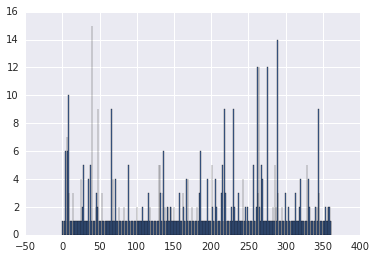

In [99]:
plt.bar(range(len(hashtag_dict)), hashtag_dict.values(), align='center')
#plt.xticks(range(len(hashtag_dict)), hashtag_dict.keys(), rotation = 'vertical')

plt.figure(figsize=(20,10))

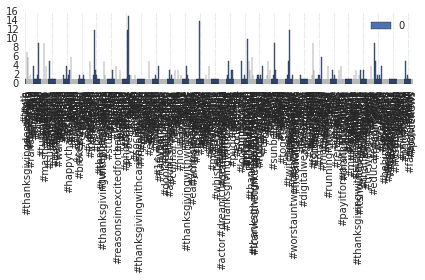

In [143]:
#fig = plt.figure(figsize=(200, 10))
hashtag_df = pd.DataFrame.from_dict(hashtag_dict, orient = 'index')
ax = hashtag_df.plot(kind = 'bar')
plt.tight_layout()

In [109]:
hashtag_df

,0
#truth,1
#pie,7
#thanksgivingdesserts…,6
#beach,1
#pecanpie,2
#turkeyday,1
#ranchomirage,1
#ag,4
#ad,1
#rvliving,1


In [127]:
hashtag_df.sort(0)

,0
#truth,1
#stpete,1
#science,1
#stuffed,1
#sale,1
#technology,1
#amazon!,1
#fall,1
#grassfedbeef,1
#icarvedtheturkeyandoutpopped,1


In [130]:
hashtag_df.pop('#thanksgiving!')

KeyError: '#thanksgiving!'

In [113]:
hashtags_2 = pd.DataFrame(hashtags)

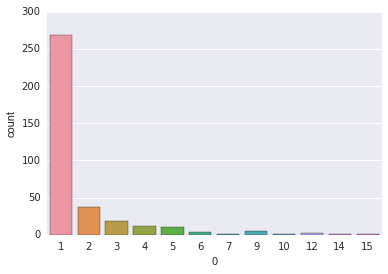

In [128]:
sns.countplot(x = 0, data = hashtag_df.sort(0))
#most of the hashtags were only used once

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

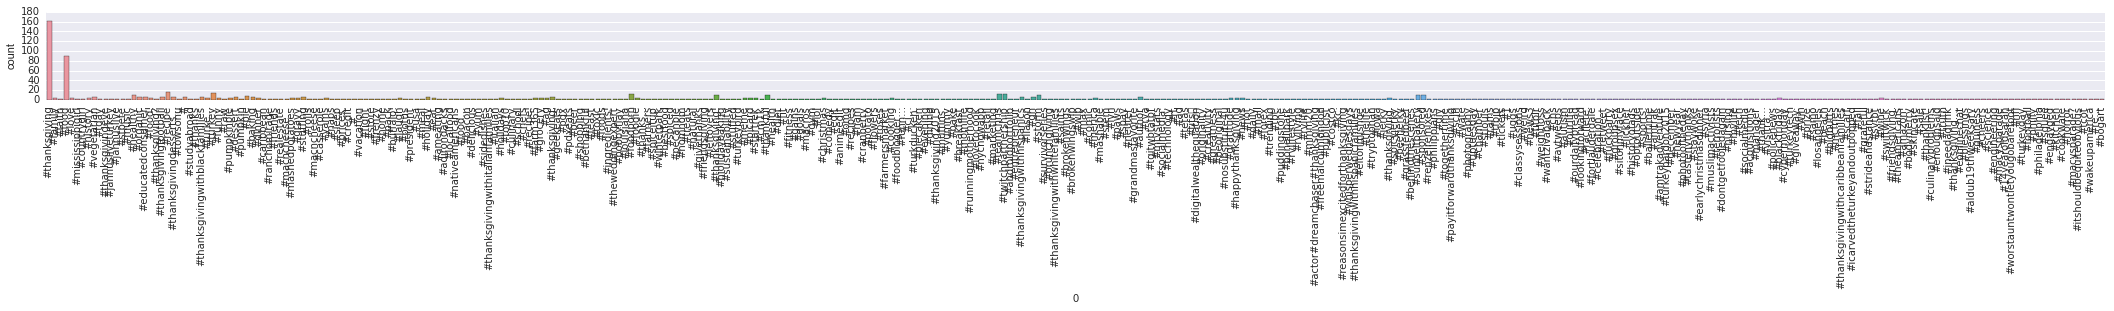

In [120]:
plt.figure(figsize=(30, 2))
sns.countplot(x = 0, data = hashtags_2)
plt.tight_layout()
plt.xticks(rotation = 'vertical')

In [132]:
hashtags_2.head()

,0
0,#thanksgiving
1,#family
2,#faith
3,#food
4,#love


In [152]:
hashtag_valuecount = pd.value_counts(hashtags_2[0])
hashtag_valuecount = hashtag_valuecount[hashtag_valuecount>2]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 <a list of 59 Text xticklabel objects>)

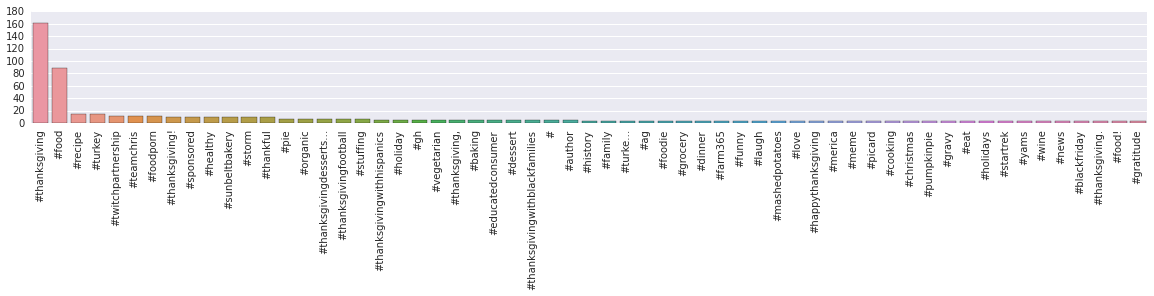

In [154]:
plt.figure(figsize=(20,2))
sns.barplot(hashtag_valuecount.index, hashtag_valuecount.values)
plt.xticks(rotation = 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]), <a list of 57 Text xticklabel objects>)

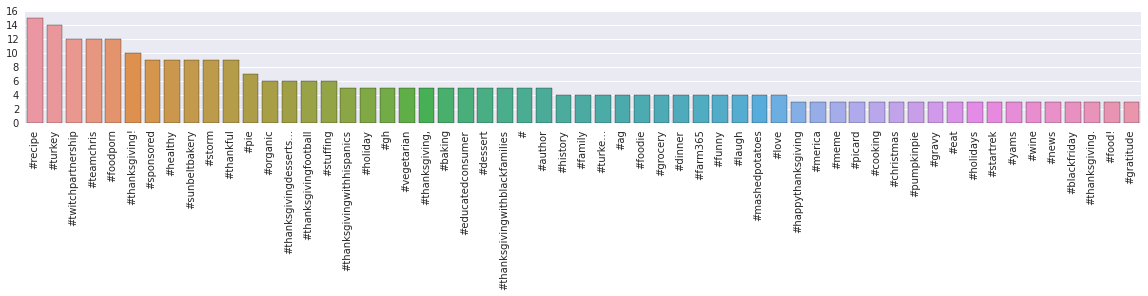

In [155]:
hashtag_valuecount.pop('#thanksgiving')
hashtag_valuecount.pop('#food')
plt.figure(figsize=(20,2))
sns.barplot(hashtag_valuecount.index, hashtag_valuecount.values)
plt.xticks(rotation = 'vertical')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

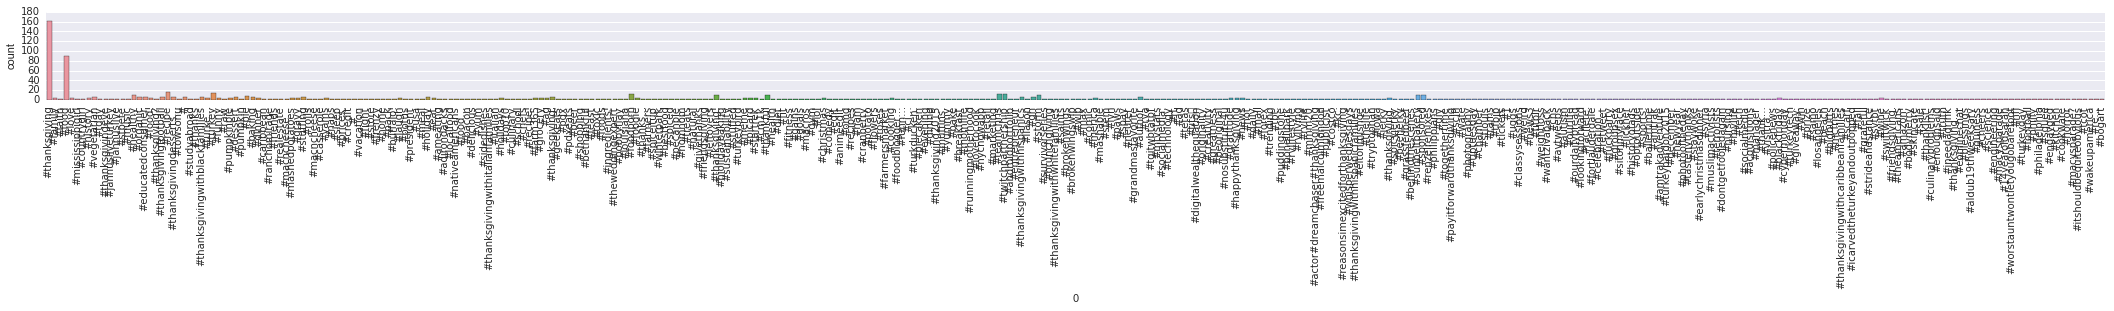

In [131]:
plt.figure(figsize=(30, 2))
sns.countplot(x = 0, data = hashtags_2[hashtags_2[0]>1])
plt.tight_layout()
plt.xticks(rotation = 'vertical')

In [ ]:
#another way of doing the above, using pandas

hashtag_counts = Counter(hashtags)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')

Below are various functions I wrote for parsing in particular fields and dealing with errors

In [9]:
def ignore_keyerrors(tweet):
    try:
        tweet['user']['location']
    except:
        return None
    return tweet['user']['location']


In [10]:
def has_geo(tweet):
    try:
        tweet['geo']
    except:
        return False
    if tweet['geo'] is not None: 
        return tweet['geo']
    else:
        return False
    

In [11]:
num = 0
for tweet in tweets_data:
        try:
            tweet['user']['location']
        except KeyError:
            num += 1
print(num)
            
    
        

NameError: name 'tweets_data' is not defined

In [ ]:
def has_coordinates(tweet):
    try:
        tweet['coordinates']
    except:
        return False
    if tweet['coordinates'] is not None: 
        return tweet['coordinates']
    else:
        return False

To do next: automate scraping at certain times of day. E.g. on the hour, for 5 minutes. See how the tweets change at different times of day